In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import numpy as np

In [2]:
#Accessing all the nc files
path=[]

#Storing the paths in a array
for i in range(1901,2023):
    path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Data\RF25_ind{i}_rfp25.nc")
    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)


In [3]:
#Accessing the indian sub divisions zones file
sub_divisions_file=pd.read_excel(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\india_spatial_zones.xlsx")
sub_divisions_file=sub_divisions_file.T      #Taking Transpose
sub_divisions_file=np.rot90(sub_divisions_file)   #Rotating 90degree


In [4]:
def selectJuneToSeptember(data,year):
    start_date = f'{year}-06-01'
    end_date = f'{year}-09-30'
    return data.sel(time=slice(start_date, end_date))

In [5]:
def PlotMap(data,year=0):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {year} from June to September')

In [6]:
#Extracting the data between month JJAS
year = 1901
for i in range(len(all_data)):
    all_data[i] = selectJuneToSeptember(all_data[i],year)
    
    #Removing the nan values
    all_data[i] = all_data[i].where(all_data[i]['rain'] != -999.)
    year+=1


In [12]:
#Defining the zones
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]


In [13]:
year=1901
for i in range(len(all_data)):
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    temp5=[]
    temp6=[]
    for j in range(len(all_data[i]['rain'])):
        temp1.append(all_data[i]['rain'][j].where(sub_divisions_file==2))
        temp2.append(all_data[i]['rain'][j].where(sub_divisions_file==3))
        temp3.append(all_data[i]['rain'][j].where(sub_divisions_file==4))
        temp4.append(all_data[i]['rain'][j].where(sub_divisions_file==6))
        temp5.append(all_data[i]['rain'][j].where(sub_divisions_file==7))
        temp6.append(all_data[i]['rain'][j].where(sub_divisions_file==8))
    zone1.append(temp1)
    zone2.append(temp2)
    zone3.append(temp3)
    zone4.append(temp4)
    zone5.append(temp5)
    zone6.append(temp6)

    print(f"{year} Done")
    year+=1

1901 Done
1902 Done
1903 Done
1904 Done
1905 Done
1906 Done
1907 Done
1908 Done
1909 Done
1910 Done
1911 Done
1912 Done
1913 Done
1914 Done
1915 Done
1916 Done
1917 Done
1918 Done
1919 Done
1920 Done
1921 Done
1922 Done
1923 Done
1924 Done
1925 Done
1926 Done
1927 Done
1928 Done
1929 Done
1930 Done
1931 Done
1932 Done
1933 Done
1934 Done
1935 Done
1936 Done
1937 Done
1938 Done
1939 Done
1940 Done
1941 Done
1942 Done
1943 Done
1944 Done
1945 Done
1946 Done
1947 Done
1948 Done
1949 Done
1950 Done
1951 Done
1952 Done
1953 Done
1954 Done
1955 Done
1956 Done
1957 Done
1958 Done
1959 Done
1960 Done
1961 Done
1962 Done
1963 Done
1964 Done
1965 Done
1966 Done
1967 Done
1968 Done
1969 Done
1970 Done
1971 Done
1972 Done
1973 Done
1974 Done
1975 Done
1976 Done
1977 Done
1978 Done
1979 Done
1980 Done
1981 Done
1982 Done
1983 Done
1984 Done
1985 Done
1986 Done
1987 Done
1988 Done
1989 Done
1990 Done
1991 Done
1992 Done
1993 Done
1994 Done
1995 Done
1996 Done
1997 Done
1998 Done
1999 Done
2000 Done


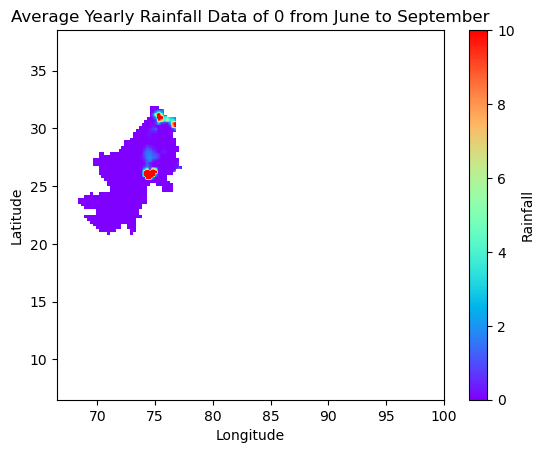

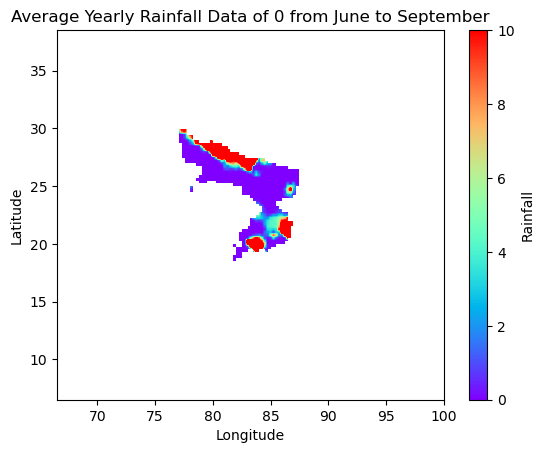

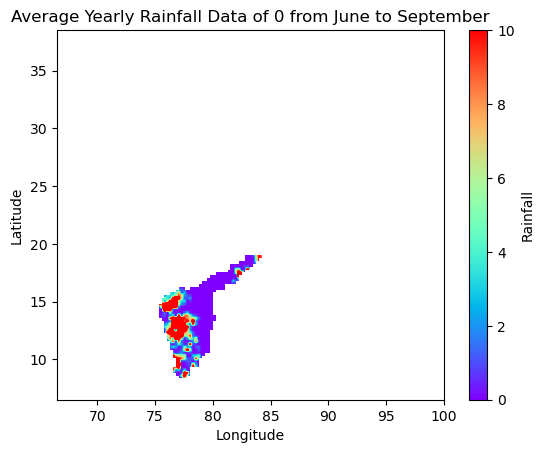

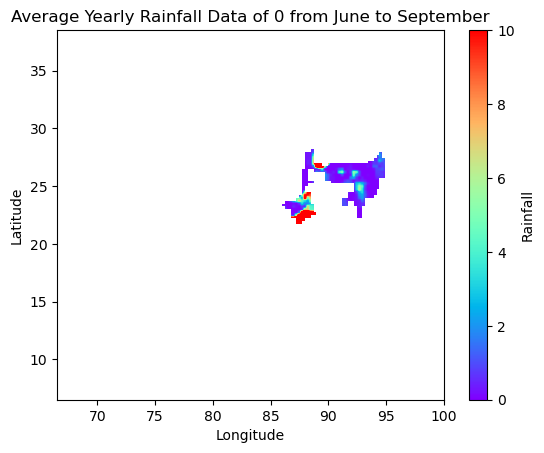

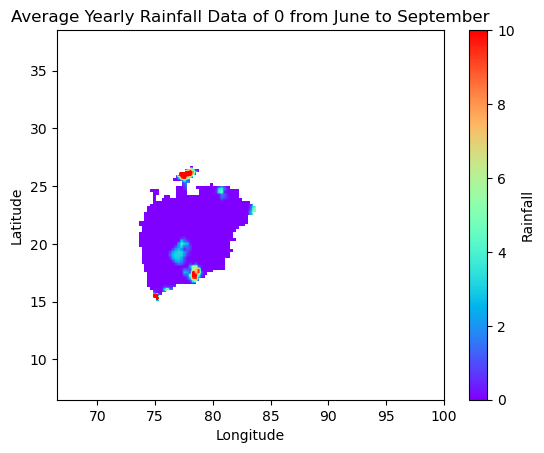

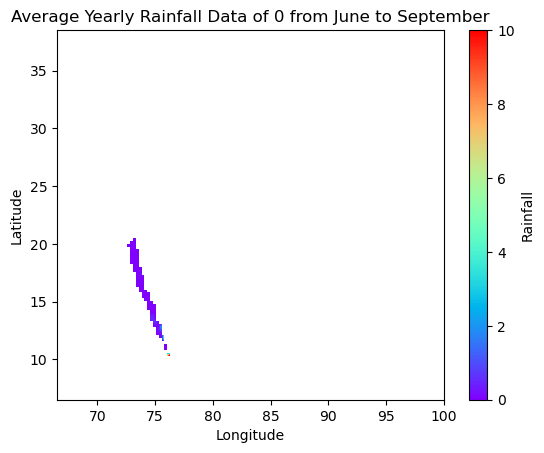

In [20]:
PlotMap(zone1[0][0])
PlotMap(zone2[0][0])
PlotMap(zone3[0][0])
PlotMap(zone4[0][0])
PlotMap(zone5[0][0])
PlotMap(zone6[0][0])

In [21]:
zone1_yearly_mean=[]
zone2_yearly_mean=[]
zone3_yearly_mean=[]
zone4_yearly_mean=[]
zone5_yearly_mean=[]
zone6_yearly_mean=[]

In [22]:
for i in range(len(zone1)):
    zone1_yearly_mean.append(xarray.concat(zone1[i], dim='time').mean(dim='time'))
    zone2_yearly_mean.append(xarray.concat(zone2[i], dim='time').mean(dim='time'))
    zone3_yearly_mean.append(xarray.concat(zone3[i], dim='time').mean(dim='time'))
    zone4_yearly_mean.append(xarray.concat(zone4[i], dim='time').mean(dim='time'))
    zone5_yearly_mean.append(xarray.concat(zone5[i], dim='time').mean(dim='time'))
    zone6_yearly_mean.append(xarray.concat(zone6[i], dim='time').mean(dim='time'))


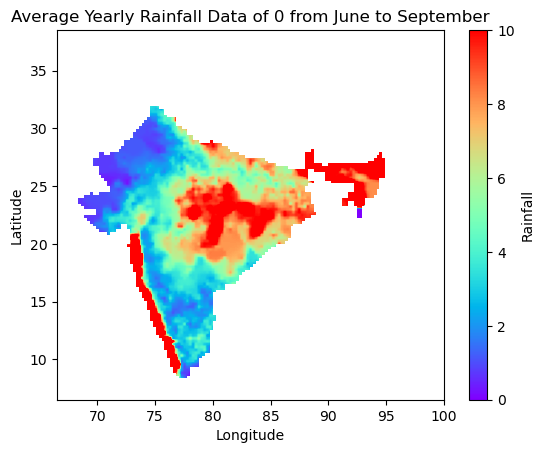

In [28]:
PlotMap(zone1_yearly_mean[0].combine_first(zone2_yearly_mean[0].combine_first(zone3_yearly_mean[0].combine_first(zone4_yearly_mean[0].combine_first(zone5_yearly_mean[0].combine_first(zone6_yearly_mean[0]))))))

In [30]:
#Saving the files
year=1901
for i in range(len(zone1_yearly_mean)):
    zone1_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone1_{year}.nc")
    zone2_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone2_{year}.nc")
    zone3_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone3_{year}.nc")
    zone4_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone4_{year}.nc")
    zone5_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone5_{year}.nc")
    zone6_yearly_mean[i].to_netcdf(fr"IndianRainfall_JJAS_Zone6_{year}.nc")
    year+=1